In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

pd.set_option('display.max_columns', None) # display all columns
pd.set_option("max_colwidth", 40) # sets a maximum column width
pd.set_option("display.precision", 7) # sets the number of decimals shown
# pd.set_option("styler.format.precision", 3) # rounds floats

df = pd.read_csv("../data/country-data.csv").set_index("country")
countries = list(df.index)
numerical_features = df.columns

In [ ]:
# Calculate descriptive statistics for the variables
stats = df.describe()
# Round the values in the table to two decimal places
rounded_stats = stats.round(2)
print(rounded_stats)



       child_mort  exports  health  imports     income  inflation  life_expec  \
count      167.00   167.00  167.00   167.00     167.00     167.00      167.00   
mean        38.27    41.11    6.82    46.89   17144.69       7.78       70.56   
std         40.33    27.41    2.75    24.21   19278.07      10.57        8.89   
min          2.60     0.11    1.81     0.07     609.00      -4.21       32.10   
25%          8.25    23.80    4.92    30.20    3355.00       1.81       65.30   
50%         19.30    35.00    6.32    43.30    9960.00       5.39       73.10   
75%         62.10    51.35    8.60    58.75   22800.00      10.75       76.80   
max        208.00   200.00   17.90   174.00  125000.00     104.00       82.80   

       total_fer       gdpp  
count     167.00     167.00  
mean        2.95   12964.16  
std         1.51   18328.70  
min         1.15     231.00  
25%         1.80    1330.00  
50%         2.41    4660.00  
75%         3.88   14050.00  
max         7.49  105000.00  


In [41]:
def style_df(df):
    """Style dataframe"""
    cell_hover = {
        'selector': 'td:hover',
        'props': [('background-color', '#ffffb3')]
    }
    row_hover = {
        'selector': 'tr:hover',
        'props': [('background-color', '#ffffb3')]
    }
    
    numeric_columns = df.select_dtypes(include=['int8','int16','int32','int64', 'float16', 'float32', 'float64']).columns
    styler = df.style
    
    styler\
        .set_caption("INSERT CAPTION")\
        .background_gradient(axis="rows", cmap="Blues", subset=['child_mort', 'exports', 'health', 'imports', 'income', 'life_expec', 'total_fer', 'gdpp'])\
        .set_table_styles([cell_hover, row_hover])\
        .format({
            "exports": "{:}%",
            "health": "{:}%",
            "imports": "{:}%",
            })\
        .highlight_max(color="red", subset=numeric_columns)\
        .highlight_min(color="lightgreen", subset=numeric_columns)\
        .bar(subset=["inflation"], align="zero", color=["red", "lightgreen"]) # bar chart
        #.highlight_quantile(q_left=0.25, q_right=0.75, subset="imports", color="red") # highlight quantiles
        #.highlight_between(left=70, right=80, subset="life_expec", color="yellow") # highlight range of values

    return styler

style_df(df.sort_values("child_mort"))

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Iceland,2.6000000,53.4%,9.4%,43.3%,38800,5.4700000,82.0000000,2.2000000,41900
Luxembourg,2.8000000,175.0%,7.77%,142.0%,91700,3.6200000,81.3000000,1.6300000,105000
Singapore,2.8000000,200.0%,3.96%,174.0%,72100,-0.0460000,82.7000000,1.1500000,46600
Finland,3.0000000,38.7%,8.95%,37.4%,39800,0.3510000,80.0000000,1.8700000,46200
Sweden,3.0000000,46.2%,9.63%,40.7%,42900,0.9910000,81.5000000,1.9800000,52100
Slovenia,3.2000000,64.3%,9.41%,62.9%,28700,-0.9870000,79.5000000,1.5700000,23400
Japan,3.2000000,15.0%,9.49%,13.6%,35800,-1.9000000,82.8000000,1.3900000,44500
Norway,3.2000000,39.7%,9.48%,28.5%,62300,5.9500000,81.0000000,1.9500000,87800
Czech Republic,3.4000000,66.0%,7.88%,62.9%,28300,-1.4300000,77.5000000,1.5100000,19800


In [42]:
# generate HTML-file ouput
with open("../out/data_overview.html", "w") as f:
    f.write(style_df(df.sort_values("child_mort")).render())

# Plotting distribution of all features

c:\Users\sutov\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\sutov\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\sutov\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\sutov\anaconda3\lib\site-pac

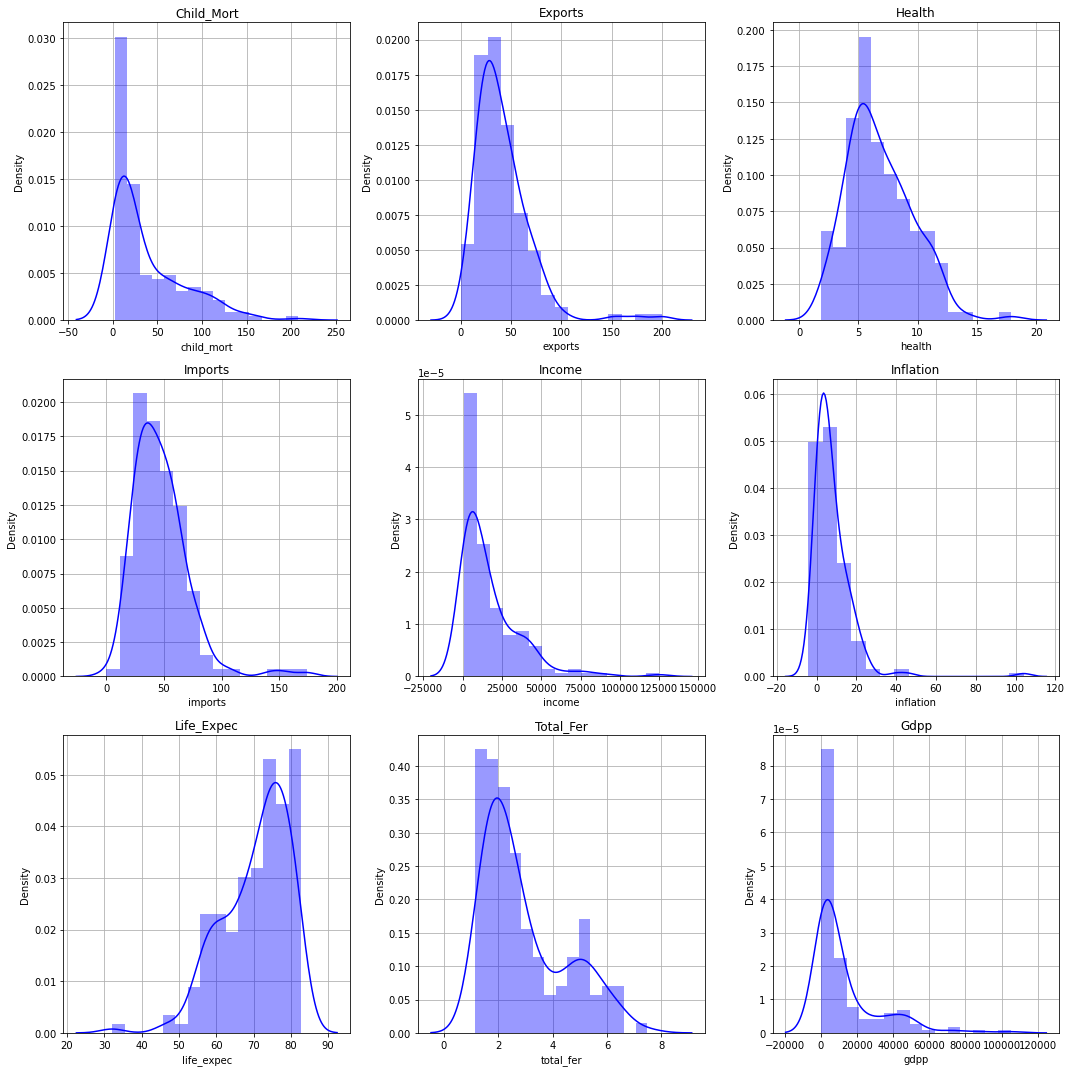

In [43]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i in range(len(numerical_features)):
    plt.subplot(3, 3, i+1)
    #sns.displot(data=df, x=numerical_features[i], kde=True)
    sns.distplot(df[numerical_features[i]], color="blue", bins=15)
    plt.grid()
    plt.title(f"{numerical_features[i].title()}")
plt.savefig("../out/distributions.png", dpi=300)
plt.tight_layout()
plt.show()

We observe that:
- **health** is somewhat normally distributed
- **life expectance** is negatively-skewed (or left-skewed)
- the of the distributions are positively skewed (right-skewed)

## Country ranking for every feature

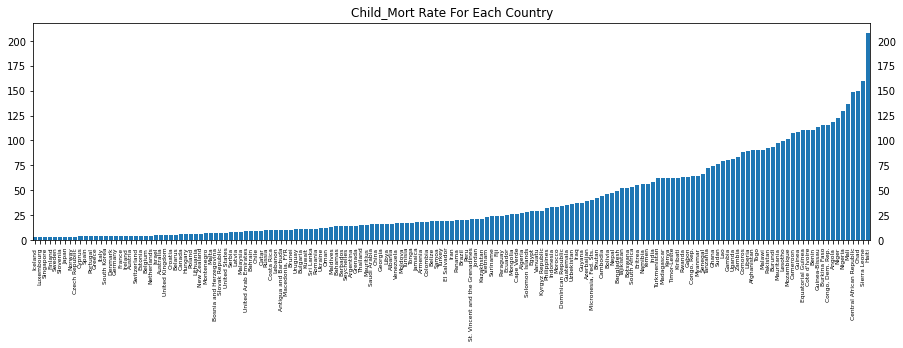

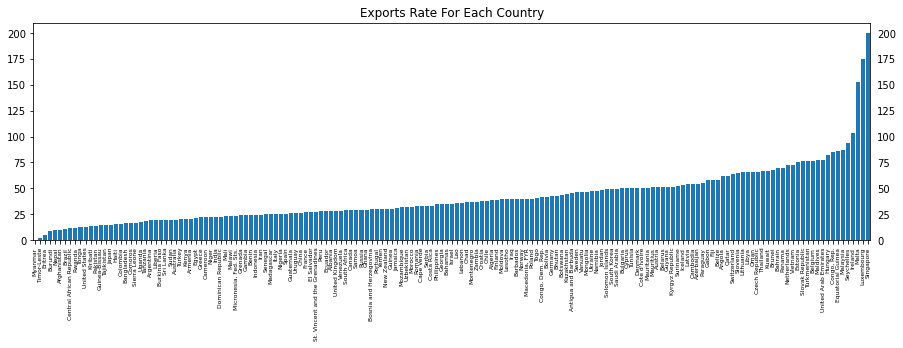

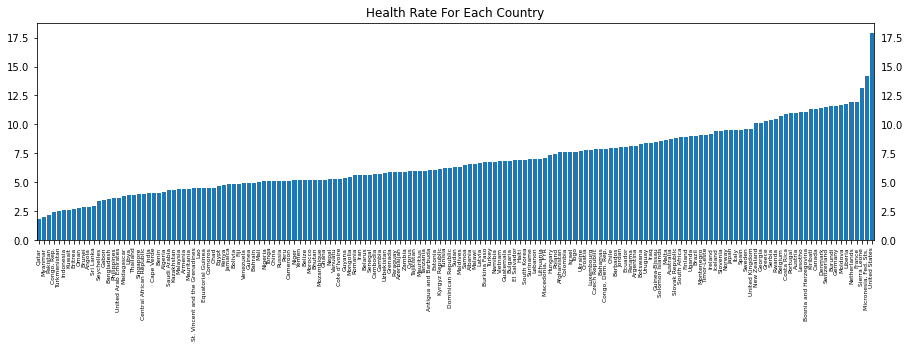

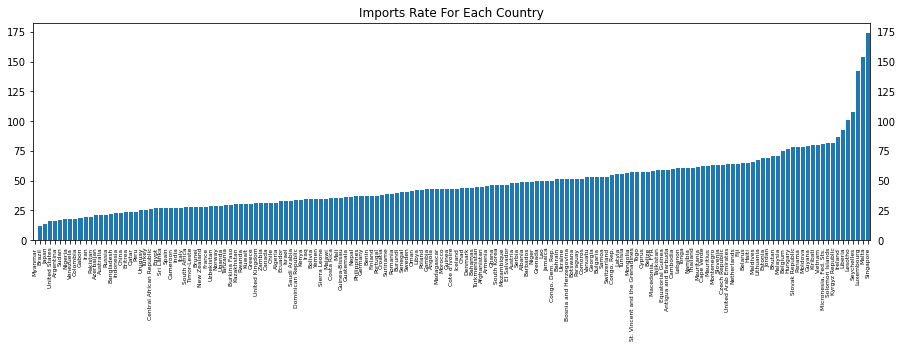

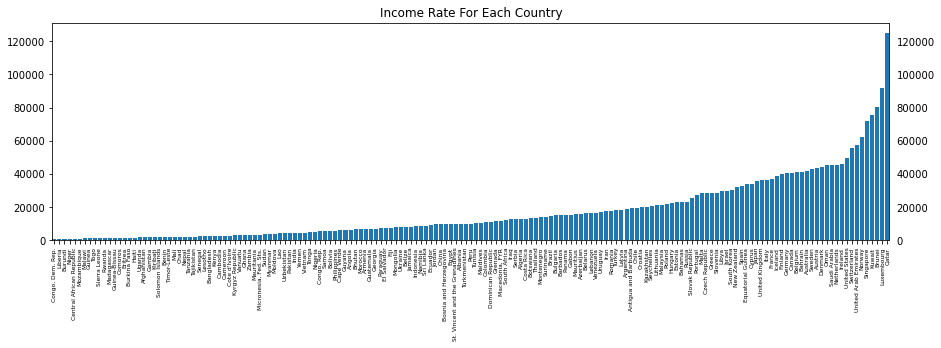

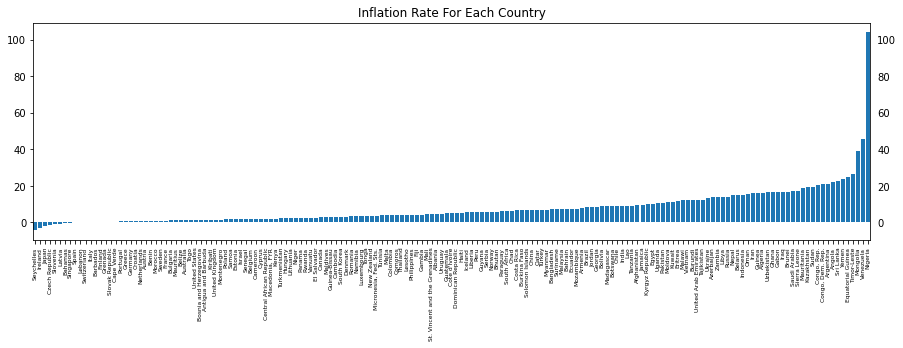

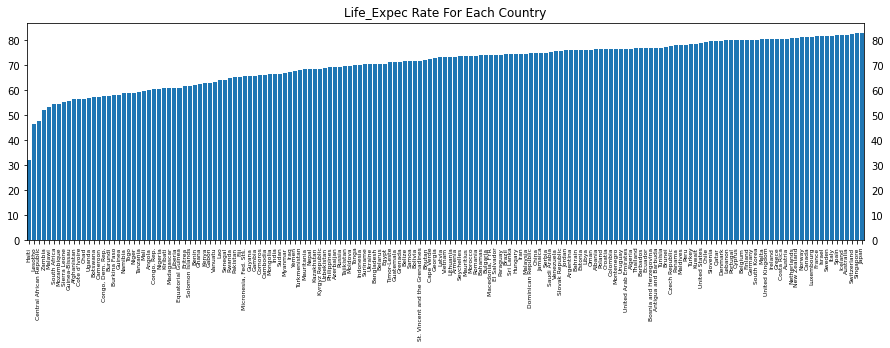

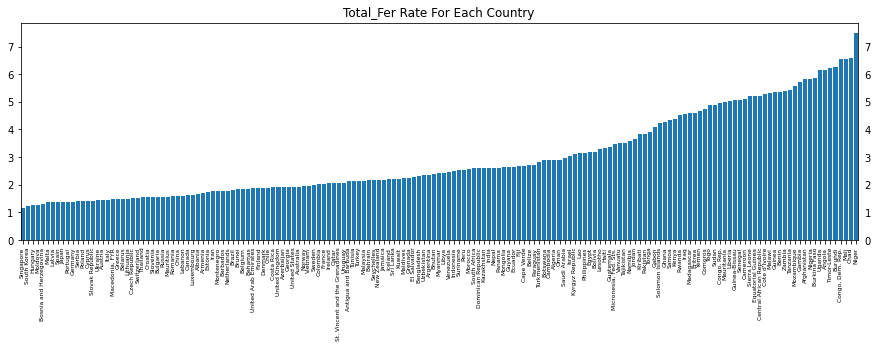

In [44]:
def barplot(feature: str):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 4))
    plt.bar(
        list(df[feature].sort_values().index), 
        df[feature].sort_values()
    )
    plt.xticks(rotation=90, fontsize=6)
    plt.tick_params(labeltop=False, labelright=True)
    plt.margins(x=0, tight=True)
    plt.title(f"{feature.title()} Rate For Each Country")
    plt.savefig(f"../out/feature_barplots/{feature}.png", dpi=400)
    #plt.show()

for feature in df.columns:
    barplot(feature)

# Low and Top feature exploration

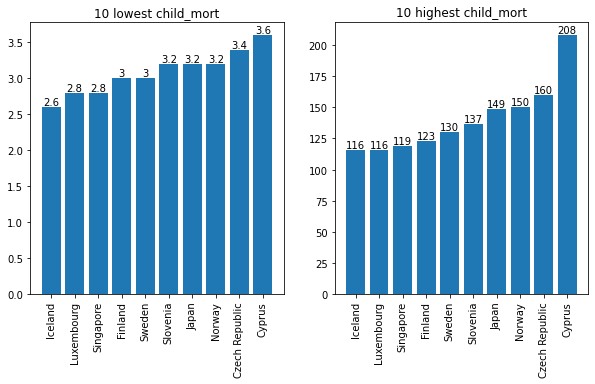

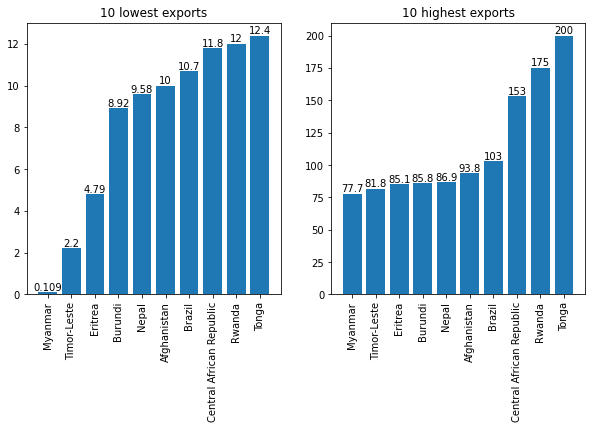

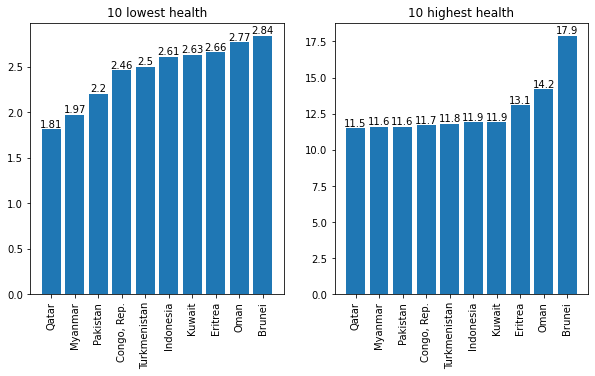

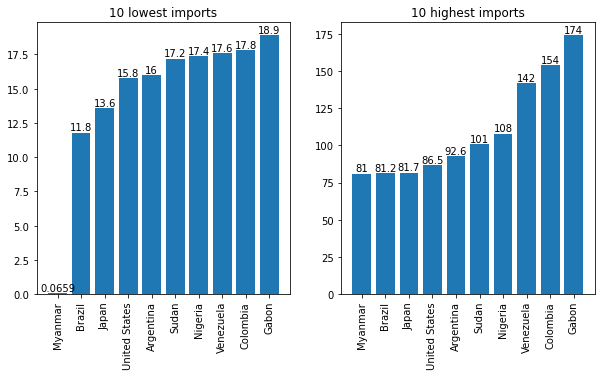

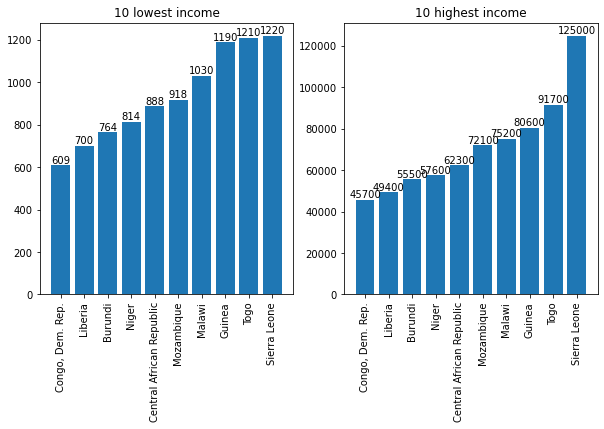

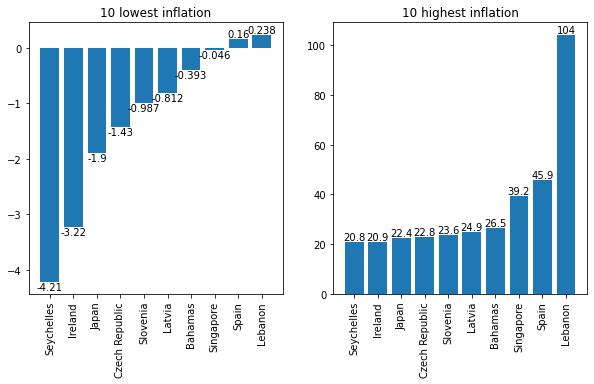

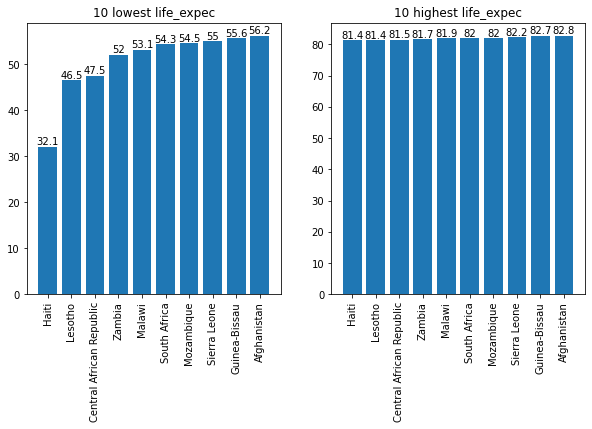

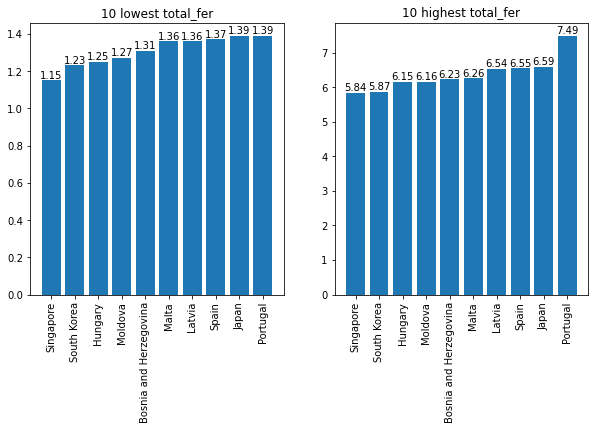

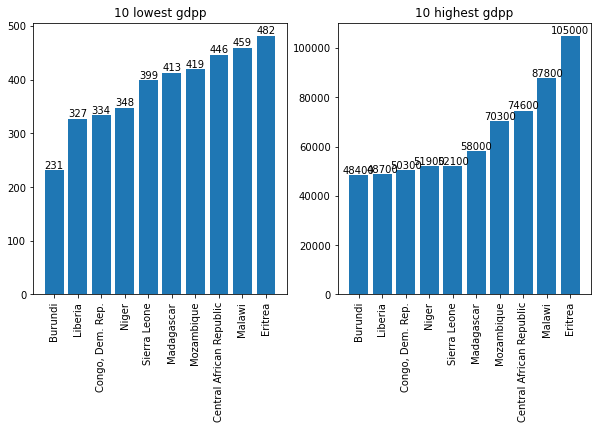

In [ ]:
# for each feature, plot the 10 top low and high features in a barplot
for feature in list(numerical_features):
    minimum = df[feature].sort_values(ascending=True).head(10)
    min_indx = list(minimum.index)
    
    maximum = df[feature].sort_values(ascending=True).tail(10)
    max_indx = list(minimum.index)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    min_bars = ax1.bar(x=list(minimum.index), height=minimum)
    ax1.set_title(f"10 lowest {feature}")
    ax1.set_xticks(ticks=min_indx, labels=min_indx, rotation=90)
    ax1.bar_label(min_bars)
    
    max_bars = ax2.bar(x=max_indx, height=maximum)
    ax2.set_title(f"10 highest {feature}")
    ax2.set_xticks(ticks=max_indx, labels=max_indx, rotation=90)
    ax2.bar_label(max_bars)
    
    plt.savefig(f"../out/top_lowest_10_countries/{feature}.png", dpi=300)
    

# Feature Correlation

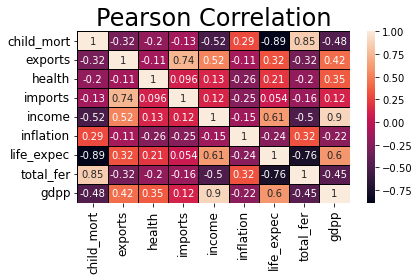

In [ ]:
# plot a heatmap for each correlation method

def heatmap(df, title, file_name):
    sns.heatmap(df, annot=True, cmap='rocket', linewidths=0.5, linecolor='black')
    plt.title(title, fontsize=24)
    plt.tick_params(axis='both', which='both', labelsize=12)
    plt.tight_layout()
    plt.savefig(f"../out/correlation_plots/{file_name}", dpi=300)
    

heatmap(df.corr(method='pearson'), 'Pearson Correlation', 'pearson_heatmap.png')
#heatmap(df.corr(method='kendall'), 'Kendall Correlation', 'kendall_heatmap.png')
#heatmap(df.corr(method='spearman'), 'Spearman Correlation', 'spearman_heatmap.png')

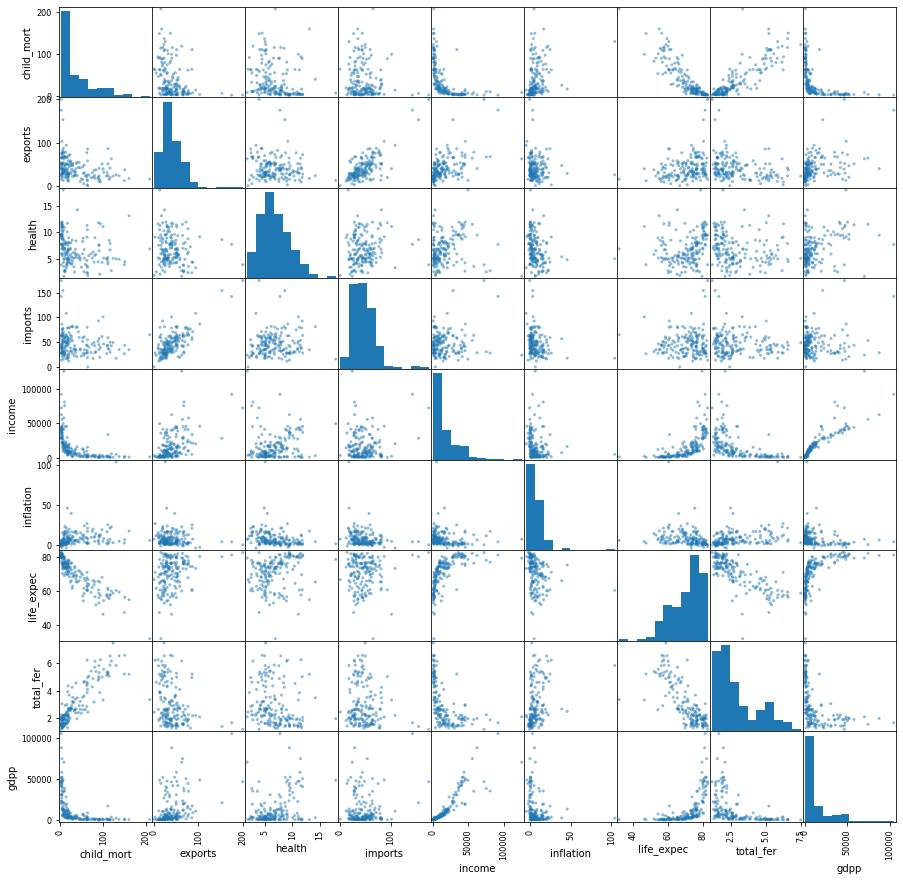

In [ ]:
# Plotting correlation matrix
pd.plotting.scatter_matrix(df[numerical_features], diagonal='hist', figsize=(15, 15))
plt.savefig("../out/scatter_matrix.png", dpi=400)
plt.show()

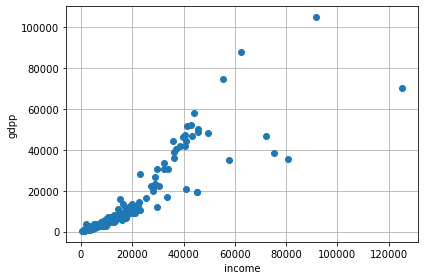

In [ ]:
def scatter(df: pd.DataFrame, x: str, y: str):
    plt.rc('axes', axisbelow=True)
    plt.grid()
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    
scatter(df, "income", "gdpp")

In [ ]:
# Mutual information score


In [ ]:
px.scatter_3d(data_frame=df, 
              x="life_expec", 
              y="health", 
              z="gdpp", 
              color="child_mort",
              hover_data=[df.index]
              )